# Linear Autoencoder applied to Wine dataset

The main objective of this Notebook is to implement a LAE to extract the latent variables using LAE. Also, using l2 regularization technique we are be able to get the same Principal Components than PCA (Bao et.al, Regularized linear autoencoders recover the principal components, eventually).

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
wine_dataset = datasets.load_wine()
X = wine_dataset.data
feature_names = wine_dataset.feature_names
target_names = wine_dataset.target_names

n, m = X.shape
print(f"Samples: {n}", f"Features: {m}")

Samples: 178 Features: 13


In [3]:
wines_df = pd.DataFrame(X, columns=feature_names)
wines_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
X_scaled = StandardScaler().fit_transform(X=X)

label_encoder = LabelEncoder()
Y_numerical = LabelEncoder().fit_transform(target_names)

In [5]:
X_tensor = torch.tensor(data=X_scaled, dtype=torch.float)

#### Autoencoder Class definition

In [6]:
class LinealAutoEncoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super().__init__()
        self.encoder = nn.Linear(input_dim, latent_dim, bias=False)
        self.decoder = nn.Linear(latent_dim, input_dim, bias=False)

    def forward(self, x):
        return self.decoder(self.encoder(x))


#### Model definition

We use Mean Square Errors loss function and Adam optimizer


In [7]:
torch.manual_seed(9)
input_dim = X.shape[1]
model = LinealAutoEncoder(input_dim=input_dim, latent_dim=3)

In [8]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

#### Training

In [9]:
num_epochs = 700
for epoch in range(num_epochs):
   optimizer.zero_grad()

   # Forward pass
   outputs = model(X_tensor)
   loss = criterion(outputs, X_tensor)

   # Backward pass and optimization
   loss.backward()
   optimizer.step()

   # Loss for each epoch
   print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

encoded_data = model.encoder(X_tensor).detach().numpy()

Epoch [1/700], Loss: 1.2107
Epoch [2/700], Loss: 1.1963
Epoch [3/700], Loss: 1.1825
Epoch [4/700], Loss: 1.1694
Epoch [5/700], Loss: 1.1569
Epoch [6/700], Loss: 1.1450
Epoch [7/700], Loss: 1.1338
Epoch [8/700], Loss: 1.1231
Epoch [9/700], Loss: 1.1129
Epoch [10/700], Loss: 1.1032
Epoch [11/700], Loss: 1.0941
Epoch [12/700], Loss: 1.0853
Epoch [13/700], Loss: 1.0770
Epoch [14/700], Loss: 1.0691
Epoch [15/700], Loss: 1.0616
Epoch [16/700], Loss: 1.0544
Epoch [17/700], Loss: 1.0474
Epoch [18/700], Loss: 1.0408
Epoch [19/700], Loss: 1.0344
Epoch [20/700], Loss: 1.0283
Epoch [21/700], Loss: 1.0224
Epoch [22/700], Loss: 1.0167
Epoch [23/700], Loss: 1.0111
Epoch [24/700], Loss: 1.0058
Epoch [25/700], Loss: 1.0005
Epoch [26/700], Loss: 0.9955
Epoch [27/700], Loss: 0.9905
Epoch [28/700], Loss: 0.9857
Epoch [29/700], Loss: 0.9810
Epoch [30/700], Loss: 0.9764
Epoch [31/700], Loss: 0.9719
Epoch [32/700], Loss: 0.9674
Epoch [33/700], Loss: 0.9630
Epoch [34/700], Loss: 0.9587
Epoch [35/700], Loss: 0

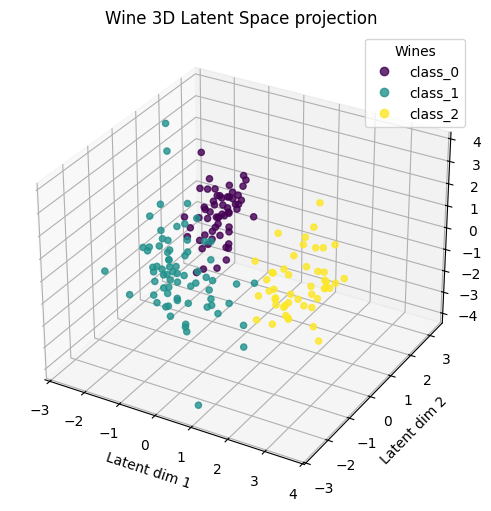

In [10]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    encoded_data[:, 0], encoded_data[:, 1], encoded_data[:, 2],
    c=wine_dataset.target,
    alpha=0.8,
    s=20
)

ax.set_title("Wine 3D Latent Space projection")
ax.set_xlabel("Latent dim 1")
ax.set_ylabel("Latent dim 2")
ax.set_zlabel("Latent dim 3")

handles, _ = scatter.legend_elements()
ax.legend(handles, wine_dataset.target_names, title="Wines")
plt.show()